following through [this](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/) article 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
opsd_daily = pd.read_csv("opsd_germany_daily.csv")

In [16]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [17]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [10]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [20]:
opsd_daily.Date = pd.to_datetime(opsd_daily.Date)
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [ ]:
opsd_daily.set_index('Date', inplace=True)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


<Axes: xlabel='Date'>

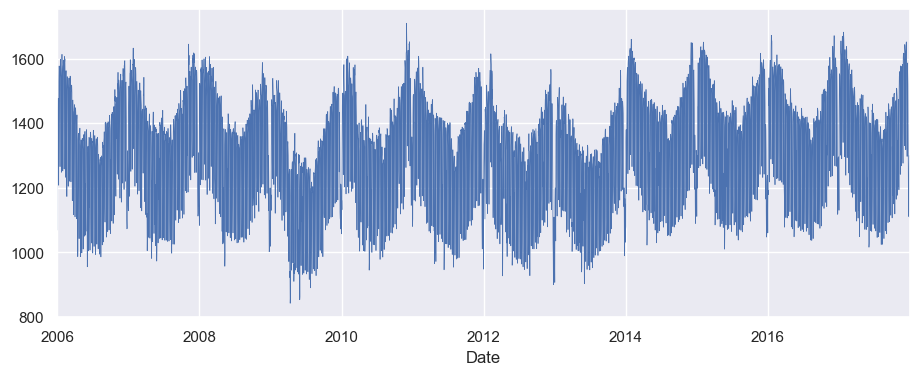

In [27]:
sns.set_theme(rc={'figure.figsize': (11,4)})
opsd_daily['Consumption'].plot(linewidth = 0.5)

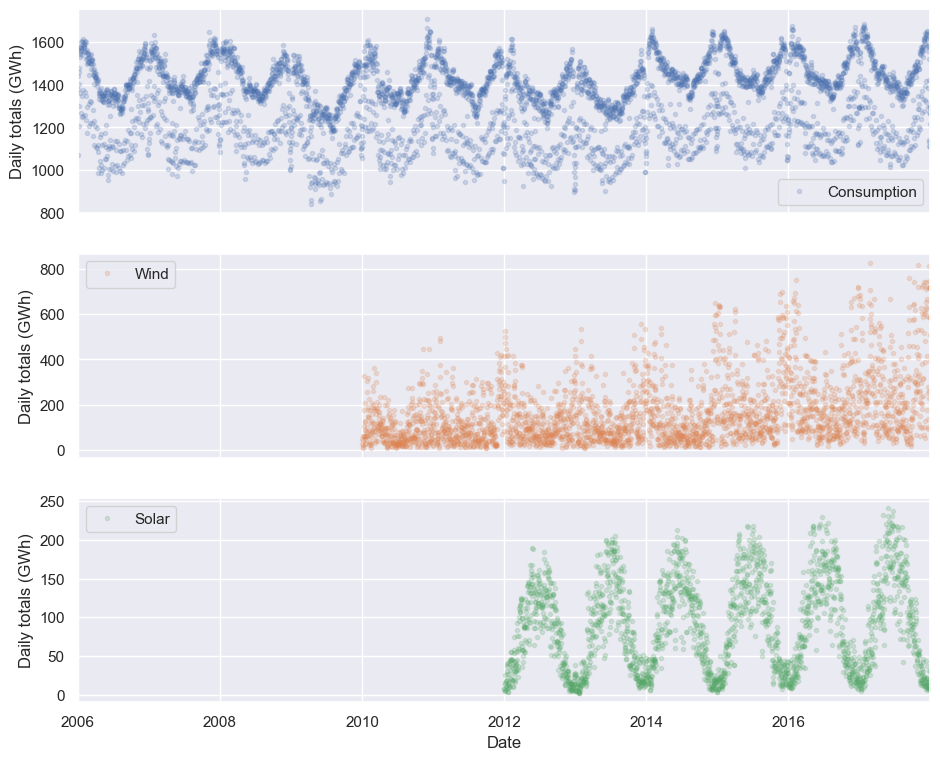

In [44]:
cols_plot = ["Consumption", "Wind", "Solar"]
axes = opsd_daily[cols_plot].plot(marker='.',alpha=0.2, linestyle='None',figsize=(11,9), subplots=True)
for ax in axes:
    ax.set_ylabel("Daily totals (GWh)")

Text(0, 0.5, 'Daily Consumption (GWh)')

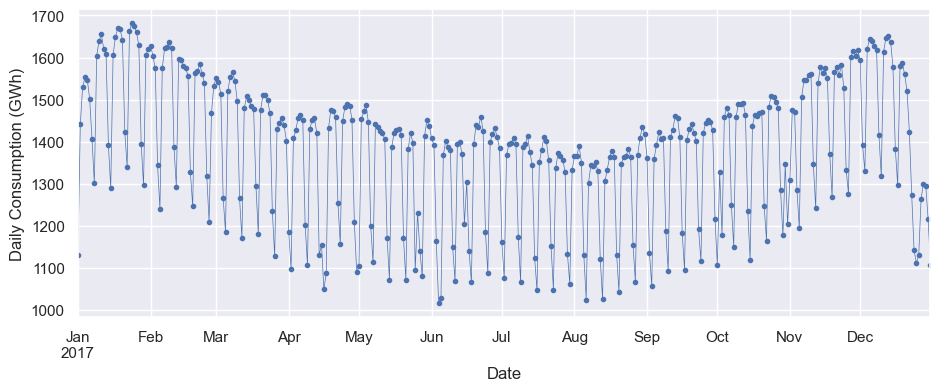

In [37]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(marker= '.', linewidth = 0.5, linestyle = '-')
ax.set_ylabel("Daily Consumption (GWh)")

Text(0, 0.5, 'Dailyy consumption (GWh)')

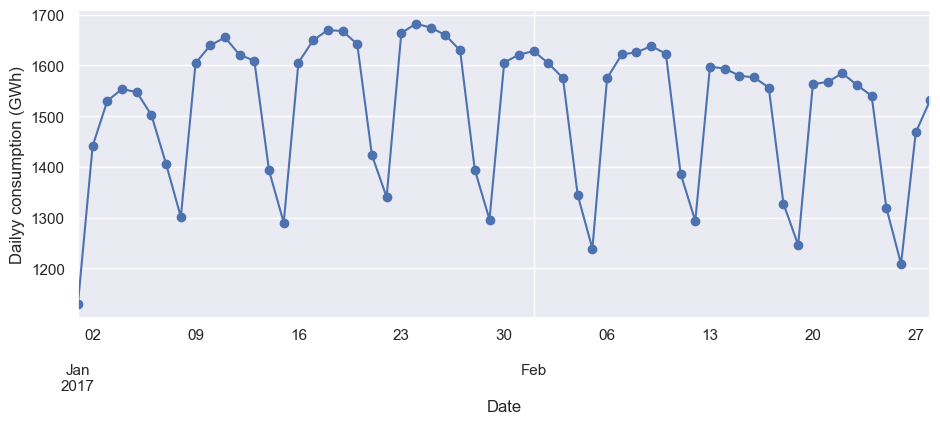

In [39]:
ax = opsd_daily.loc['2017-01': '2017-02', 'Consumption'].plot(marker='o')
ax.set_ylabel("Dailyy consumption (GWh)")

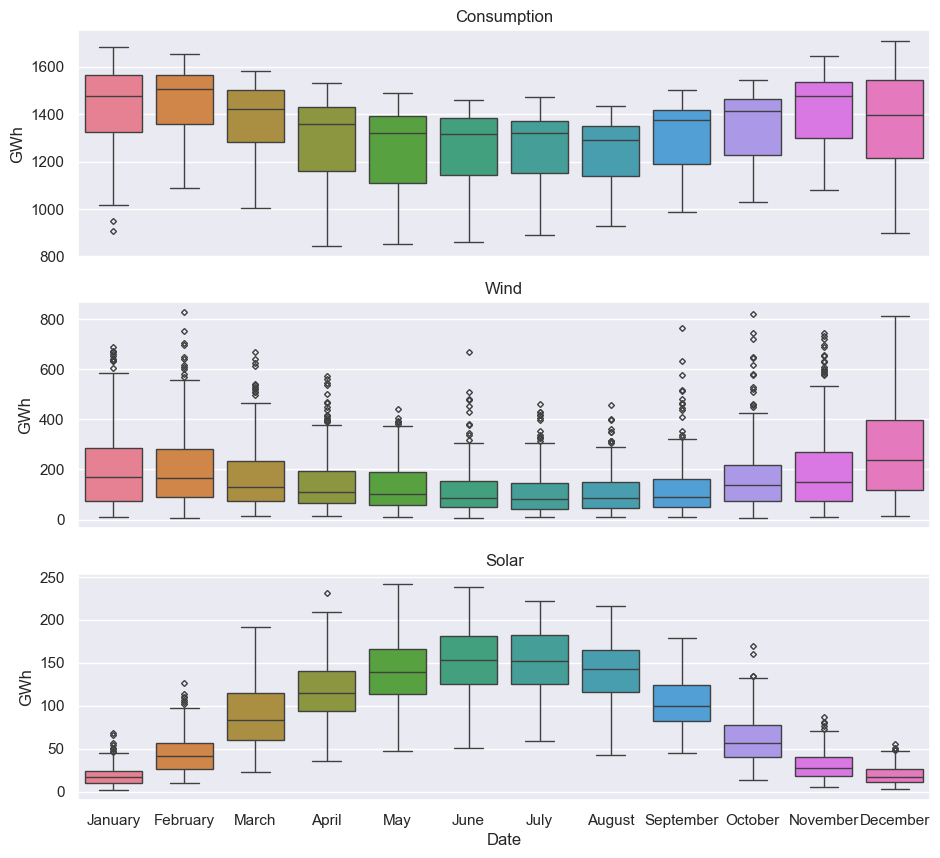

In [75]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name,ax in zip(cols_plot, axes):
    sns.boxplot(
        data=opsd_daily, 
        x=opsd_daily.index.month_name(), 
        y=name, 
        ax=ax,
        hue=opsd_daily.index.month_name(),
        palette="husl", 
        flierprops=dict(marker='D', markersize=3)
    )
    ax.set_ylabel('GWh')
    ax.set_title(name)

<Axes: xlabel='Date', ylabel='Consumption'>

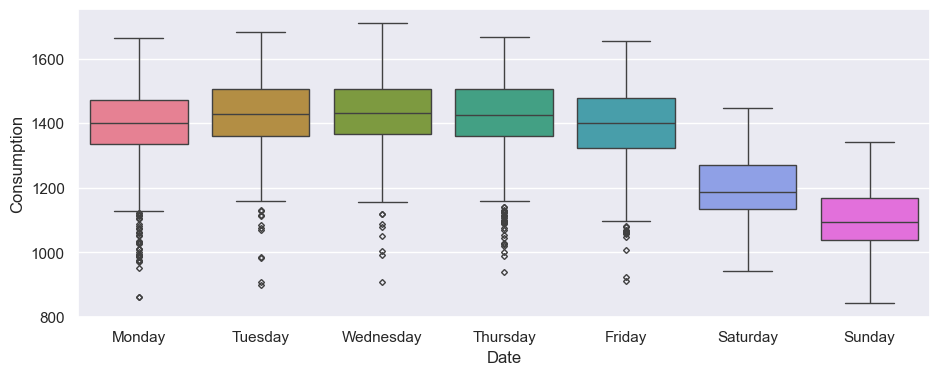

In [79]:
weekday_order = [
    "Monday", "Tuesday", "Wednesday", 
    "Thursday", "Friday", "Saturday", "Sunday"
]

sns.boxplot(
    data=opsd_daily, 
    x=opsd_daily.index.day_name(), 
    y="Consumption",
    hue= opsd_daily.index.day_name(),
    palette="husl",
    flierprops=dict(marker= "D", markersize=3),
    order=weekday_order,
    hue_order= weekday_order
)